<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Estatistica_Tipos_Distribui%C3%A7%C3%B5es_Padroniza%C3%A7%C3%A3o(z_score)_dadosEnviesados_Testes_NaiveBayes_tecnica_RLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Variaveis continuas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

- Distribuição Normal (Distribuição Gaussiana)(bell)

In [2]:
base_normal = stats.norm.rvs(size=1000, random_state=1)

In [3]:
base_normal #dados aleatorios

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

In [4]:
min(base_normal), max(base_normal)

(-3.053764380426305, 3.9586027040379634)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


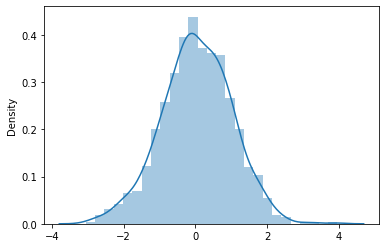

In [5]:
sns.distplot(base_normal,hist=True,kde=True);

vamos ver a média, mediana, moda, variancia e desvio padrão dos dados

In [6]:
base_normal.mean(), np.median(base_normal), stats.mode(base_normal), np.var(base_normal), np.std(base_normal)

(0.03881247615960185,
 0.04129258886921605,
 ModeResult(mode=array([-3.05376438]), count=array([1])),
 0.9623691107920885,
 0.9810041339322116)

In [7]:
np.sum((base_normal >= 0.9810041339322116) & (base_normal <= 0.9810041339322116 + 1)) #elementos da direita no gráfico

148

In [8]:
np.sum((base_normal <= 0.9810041339322116) & (base_normal >= 0.9810041339322116 - 1)) #elementos da esquerda do grafico

353

In [9]:
(148 + 353) / 1000 # resultado sao os elementos do meio da grafico, 50%

0.501

outro exemplo: base com dados de alturas

In [10]:
base_altura = np.array([126, 148, 162, 180, 121, 171, 162, 137, 133,
                       160, 175, 182, 183, 156, 147, 179, 170, 180,
                       180, 178, 157, 166, 174, 154, 178, 196, 165,
                       161, 193, 124, 133, 158, 189, 169, 130, 165,
                       149, 179, 158, 149, 140, 151, 150, 146, 181,
                       188, 190, 157, 167, 163, 150, 149, 182, 169,
                       151, 139, 148, 155, 156, 170, 150, 170, 172,
                       168, 192, 143, 129, 167, 177, 166, 166, 179,
                       150, 180, 168, 161, 171, 161, 129, 133, 122,
                       121, 130, 138, 157, 133, 168, 179, 179, 158,
                       147, 179, 180, 154, 139, 169, 170, 150, 178, 140.8])

In [11]:
base_altura = np.sort(base_altura) #ordem

In [12]:
base_altura

array([121. , 121. , 122. , 124. , 126. , 129. , 129. , 130. , 130. ,
       133. , 133. , 133. , 133. , 137. , 138. , 139. , 139. , 140. ,
       140.8, 143. , 146. , 147. , 147. , 148. , 148. , 149. , 149. ,
       149. , 150. , 150. , 150. , 150. , 150. , 151. , 151. , 154. ,
       154. , 155. , 156. , 156. , 157. , 157. , 157. , 158. , 158. ,
       158. , 160. , 161. , 161. , 161. , 162. , 162. , 163. , 165. ,
       165. , 166. , 166. , 166. , 167. , 167. , 168. , 168. , 168. ,
       169. , 169. , 169. , 170. , 170. , 170. , 170. , 171. , 171. ,
       172. , 174. , 175. , 177. , 178. , 178. , 178. , 179. , 179. ,
       179. , 179. , 179. , 179. , 180. , 180. , 180. , 180. , 180. ,
       181. , 182. , 182. , 183. , 188. , 189. , 190. , 192. , 193. ,
       196. ])

In [13]:
len(base_altura)

100

In [14]:
min(base_altura), max(base_altura)

(121.0, 196.0)

estatisticas

In [15]:
base_altura.mean(), np.median(base_altura), stats.mode(base_altura), np.std(base_altura), np.var(base_altura), stats.variation(base_altura) * 100

(160.028,
 161.5,
 ModeResult(mode=array([179.]), count=array([6])),
 18.37404734945461,
 337.605616,
 11.481770283609501)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


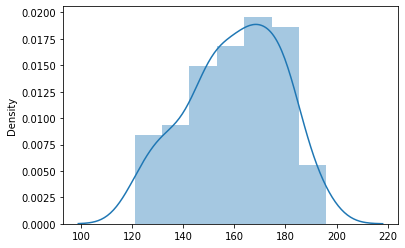

In [16]:
sns.distplot(base_altura);

- Enviesamento

In [17]:
from scipy.stats import skewnorm

In [18]:
base_normal = skewnorm.rvs(a =0, size=100) # a=0 , nao tem enviesamento

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


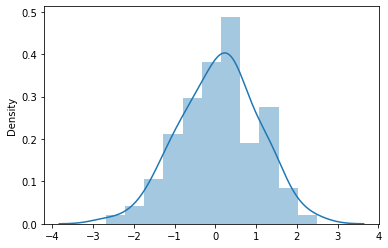

In [19]:
sns.distplot(base_normal);

In [20]:
base_normal.mean(), np.median(base_normal), stats.mode(base_normal)

(0.08637864598150814,
 0.1479226435469101,
 ModeResult(mode=array([-2.68485739]), count=array([1])))

In [21]:
dados_enviesados_positivo = skewnorm.rvs(a =10, size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


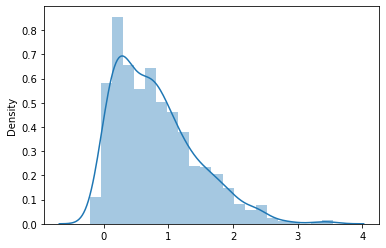

In [22]:
sns.distplot(dados_enviesados_positivo); #esta enviesado para o canto esquerdo

dados enviesados positivos tem a caracteristica de ter média > mediana > moda

In [23]:
dados_enviesados_positivo.mean(), np.median(dados_enviesados_positivo), stats.mode(dados_enviesados_positivo)

(0.7981389326144003,
 0.6884135682119619,
 ModeResult(mode=array([-0.21072035]), count=array([1])))

In [24]:
dados_enviesados_negativo = skewnorm.rvs(a =-10, size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


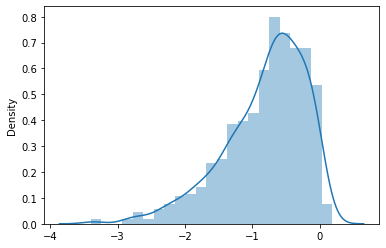

In [25]:
sns.distplot(dados_enviesados_negativo); #enviesado para o canto direito

aqui a caraceristica é ter a mediana > média

In [26]:
dados_enviesados_negativo.mean(), np.median(dados_enviesados_negativo), stats.mode(dados_enviesados_negativo)

(-0.811556387345161,
 -0.6792045450226606,
 ModeResult(mode=array([-3.40368113]), count=array([1])))

- Distribuição Normal Padronizada

In [27]:
dados_normal_padronizado = np.random.standard_normal(size=1000)

In [28]:
min(dados_normal_padronizado), max(dados_normal_padronizado)

(-3.9496631298648777, 3.5300432187774318)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


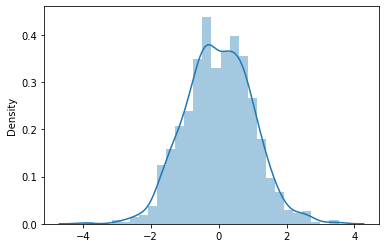

In [29]:
sns.distplot(dados_normal_padronizado);

padronizado se espera a média em torno de zero, e o desvio padrao em torno de 1

In [30]:
dados_normal_padronizado.mean(), np.std(dados_normal_padronizado)

(0.0026164678628132414, 0.9813592862895351)

In [31]:
media = base_altura.mean()
media

160.028

In [32]:
desvio_padrao = np.std(base_altura)
desvio_padrao

18.37404734945461

In [33]:
base_padronizada = (base_altura - media) / desvio_padrao #z-score
base_padronizada

array([-2.12408291e+00, -2.12408291e+00, -2.06965832e+00, -1.96080914e+00,
       -1.85195996e+00, -1.68868619e+00, -1.68868619e+00, -1.63426160e+00,
       -1.63426160e+00, -1.47098783e+00, -1.47098783e+00, -1.47098783e+00,
       -1.47098783e+00, -1.25328947e+00, -1.19886488e+00, -1.14444029e+00,
       -1.14444029e+00, -1.09001570e+00, -1.04647602e+00, -9.26741924e-01,
       -7.63468153e-01, -7.09043563e-01, -7.09043563e-01, -6.54618973e-01,
       -6.54618973e-01, -6.00194382e-01, -6.00194382e-01, -6.00194382e-01,
       -5.45769792e-01, -5.45769792e-01, -5.45769792e-01, -5.45769792e-01,
       -5.45769792e-01, -4.91345202e-01, -4.91345202e-01, -3.28071431e-01,
       -3.28071431e-01, -2.73646840e-01, -2.19222250e-01, -2.19222250e-01,
       -1.64797660e-01, -1.64797660e-01, -1.64797660e-01, -1.10373069e-01,
       -1.10373069e-01, -1.10373069e-01, -1.52388853e-03,  5.29007018e-02,
        5.29007018e-02,  5.29007018e-02,  1.07325292e-01,  1.07325292e-01,
        1.61749883e-01,  

In [34]:
base_padronizada.mean(), np.std(base_padronizada) # 0 media e 1 std

(4.596323321948148e-16, 1.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


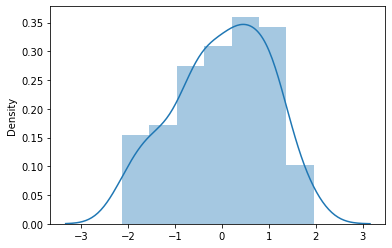

In [35]:
sns.distplot(base_padronizada); #mesma distribuição

- Teorema Central do Limite

"Quando o tamanho da amostra aumenta, a distribuição da amostra da sua média aproxima-se cada vez mais de uma distribuiçao normal"

In [36]:
alturas = np.random.randint(121, 196, 500) #500 valores aleatorios entre 121 e 196
alturas.mean()

156.214

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


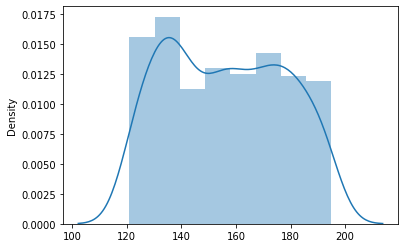

In [37]:
sns.distplot(alturas);

In [38]:
medias = [np.mean(np.random.randint(121, 196, 500)) for i in range(1000)] #1000 distr aleatorias

In [39]:
type(medias), len(medias)

(list, 1000)

In [40]:
print(medias)


[157.772, 159.008, 157.614, 156.414, 155.804, 158.06, 158.27, 158.542, 157.78, 158.538, 158.166, 157.736, 156.522, 158.092, 156.166, 159.064, 157.67, 157.616, 157.544, 159.158, 159.758, 156.59, 157.688, 158.028, 157.508, 158.476, 158.164, 159.416, 158.544, 158.02, 157.738, 157.17, 159.174, 158.944, 157.788, 158.838, 157.8, 157.334, 159.178, 157.828, 157.272, 158.85, 157.634, 159.826, 157.91, 157.806, 156.918, 160.844, 158.596, 157.76, 159.088, 158.97, 158.466, 159.536, 158.532, 158.938, 158.378, 157.906, 158.998, 157.802, 159.228, 158.212, 156.646, 158.734, 158.794, 158.282, 159.0, 156.166, 157.894, 158.214, 159.076, 157.546, 157.032, 157.778, 156.96, 157.214, 157.114, 157.276, 158.068, 160.138, 159.362, 157.902, 157.638, 159.898, 157.242, 156.49, 156.918, 158.804, 158.622, 158.996, 157.36, 158.15, 159.26, 157.5, 158.946, 157.894, 158.87, 159.33, 158.004, 158.398, 160.358, 159.392, 159.566, 158.202, 158.768, 159.1, 160.138, 156.972, 157.778, 157.922, 158.49, 158.094, 160.568, 159.34, 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


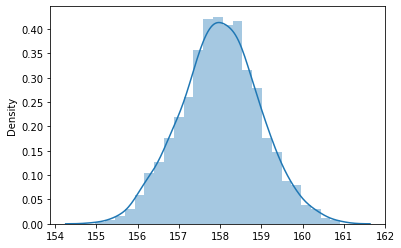

In [41]:
sns.distplot(medias); #provando o terorema central do limite, agora teremos uma distr. normal

- Distribuição Gamma

In [42]:
from scipy.stats import gamma

In [43]:
base_gamma = gamma.rvs(a=1, size=1000) #a é o ponto de decaimento

In [44]:
base_gamma

array([1.71783852e+00, 1.32149591e+00, 3.19019634e-02, 1.55168117e-01,
       2.44303061e+00, 1.22165947e+00, 1.67231352e+00, 4.09733977e+00,
       4.53752490e-02, 9.30739217e-01, 1.02004269e+00, 1.23495248e+00,
       4.99015099e-01, 3.22049634e-01, 9.61870802e-01, 1.01773396e-01,
       4.65029011e-01, 9.02139354e-01, 1.13069730e+00, 1.92018995e-01,
       2.13729883e-01, 1.90707054e+00, 7.30804626e-01, 6.77597707e-01,
       1.52874720e+00, 1.00140160e+00, 1.93584282e+00, 7.04030003e-01,
       1.41646277e-01, 7.13703996e-01, 8.71344366e-01, 1.69339174e-01,
       5.33669292e-01, 6.13455271e-01, 1.71447040e+00, 1.67155041e+00,
       4.38363999e-02, 4.31580121e-02, 5.41699469e-01, 4.87518598e+00,
       8.91479522e-01, 6.21097529e-01, 8.24604456e-01, 4.86456096e-01,
       4.05776366e-01, 1.34629585e-01, 7.18510978e-01, 7.14674464e-01,
       6.14216374e-01, 7.82582435e+00, 4.56230344e-01, 6.21378206e-02,
       5.62960317e-01, 9.87743787e-01, 3.30597156e+00, 7.64351488e-01,
      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


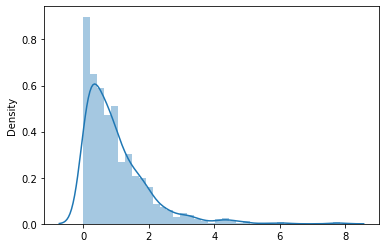

In [45]:
sns.distplot(base_gamma);

In [46]:
min(base_gamma), max(base_gamma)

(0.001595683534782219, 7.825824352919403)

- Distribuição Exponencial

In [47]:
from scipy.stats import expon

In [48]:
base_exp = expon.rvs(size=1000); #é um tipo da distr gamma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


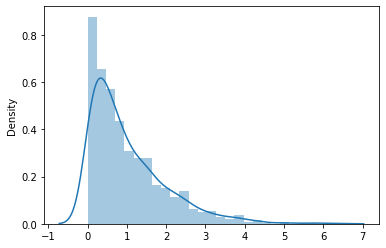

In [49]:
sns.distplot(base_exp);

In [50]:
min(base_exp), max(base_exp)

(0.0010367075899140375, 6.303806856623468)

- Ditr. Uniforme

In [51]:
from scipy.stats import uniform

In [52]:
base_uniforme = uniform.rvs(size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


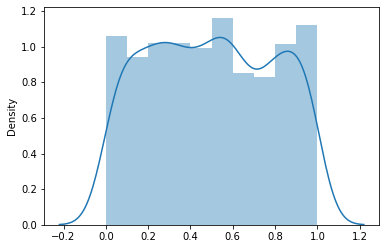

In [53]:
sns.distplot(base_uniforme);

In [54]:
min(base_uniforme), max(base_uniforme)

(0.0008245400280662007, 0.9990145629306905)

In [55]:
np.unique(base_uniforme, return_counts=True)

(array([8.24540028e-04, 9.70942526e-04, 1.27261108e-03, 1.39573262e-03,
        1.53203221e-03, 4.04487586e-03, 4.91879908e-03, 5.98554766e-03,
        1.12465100e-02, 1.15832026e-02, 1.17526374e-02, 1.32548432e-02,
        1.32992369e-02, 1.41798927e-02, 1.42651154e-02, 1.52645237e-02,
        1.53675990e-02, 1.65228553e-02, 1.67513753e-02, 1.72231391e-02,
        1.81233285e-02, 1.90151230e-02, 2.00221177e-02, 2.01421866e-02,
        2.10878238e-02, 2.12354413e-02, 2.22942308e-02, 2.26790283e-02,
        2.29322721e-02, 2.30129365e-02, 2.30150828e-02, 2.49055915e-02,
        2.50944303e-02, 3.00390147e-02, 3.04403550e-02, 3.10671195e-02,
        3.14114369e-02, 3.73325015e-02, 3.82515204e-02, 3.84547883e-02,
        3.85884312e-02, 3.86304229e-02, 3.90752400e-02, 3.92432852e-02,
        4.14777213e-02, 4.14953643e-02, 4.24456571e-02, 4.28980546e-02,
        4.52029389e-02, 4.85021637e-02, 4.94469326e-02, 5.00995933e-02,
        5.02058279e-02, 5.07326006e-02, 5.09401439e-02, 5.261106

aplicando essa distr uniforme em um modelo de ML

In [56]:
data = pd.read_csv('/content/credit_data.csv')

In [57]:
data.dropna(inplace=True)

In [58]:
data.shape

(1997, 5)

In [59]:
data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [60]:
x = data.iloc[:,1:4].values
y = data.iloc[:,4].values

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

treinando desta maneira para termos 30 resultados diferentes na acurácia:

In [62]:
resultados_naive_bayes = []
for i in range(30):
  x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2,stratify = y, random_state = i)
  naive_bayes = GaussianNB()
  naive_bayes.fit(x_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(x_teste)))

print(resultados_naive_bayes)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


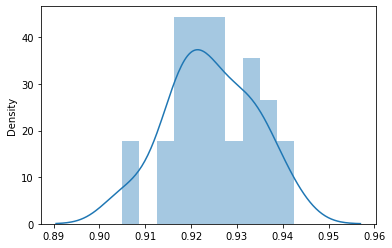

In [63]:
sns.distplot(resultados_naive_bayes, bins=10); #distr uniforme dos valores do modelo de ML

**Variaveis Discretas**

- Distribuição de Bernoulli

In [64]:
# tipo da distr binominal # sucesso ou #fracasso

In [65]:
from scipy.stats import bernoulli

In [67]:
base_bernoulli = bernoulli.rvs(size=1000, p=0.5) #p é prob de sucesso

In [68]:
base_bernoulli

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [69]:
np.unique(base_bernoulli, return_counts=True) #p=0.5 existe 50% pra visualizar 0 e 1, poderiamos ter colcado outro valor

(array([0, 1]), array([519, 481]))

acima temos duas respostas, ou é sim, ou é não

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


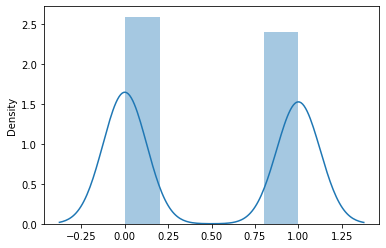

In [70]:
sns.distplot(base_bernoulli);

- Distribuição Binominal

In [72]:
#assim como a anterior, mas aqui podemos ter mais caracteristicas, vamos ver

In [73]:
from scipy.stats import binom

In [77]:
base_binominal = binom.rvs(size=1000, n=2, p=0.5) #n numero de caract e p probabilidade

In [78]:
print(base_binominal)

[1 1 1 1 2 2 1 1 1 1 2 2 2 0 0 0 2 1 0 0 2 2 1 2 1 1 0 0 1 0 0 1 2 2 1 1 0
 1 1 0 1 1 1 1 1 2 0 2 0 2 2 1 1 2 1 1 1 2 2 2 0 0 1 2 1 1 1 1 0 1 1 2 1 1
 1 2 0 0 1 2 0 0 2 1 1 1 2 1 1 0 1 1 2 0 2 0 1 0 2 1 0 1 1 1 0 2 1 2 1 2 2
 0 0 0 0 1 1 1 0 1 1 1 0 2 1 1 1 2 1 1 2 2 2 2 1 1 1 1 1 2 1 2 1 1 1 2 0 2
 1 2 1 1 2 1 1 2 0 0 2 0 1 1 2 1 1 0 2 1 2 1 1 1 0 2 0 2 2 2 2 0 2 2 0 1 1
 1 1 2 0 1 1 1 2 1 2 0 1 2 1 2 1 1 0 1 1 2 1 2 1 1 2 0 1 1 1 1 2 1 1 2 2 1
 0 2 0 1 2 1 0 2 1 1 0 0 1 1 1 2 1 2 0 0 1 1 0 1 2 1 2 1 1 2 1 1 0 2 0 1 0
 2 2 2 2 0 1 0 2 1 1 0 0 2 0 1 1 2 0 2 1 1 2 2 0 2 1 0 1 1 2 1 0 0 1 2 0 1
 0 1 1 1 2 1 0 2 0 1 2 0 2 1 1 1 1 2 2 0 1 2 2 0 1 1 1 2 1 2 0 2 1 1 1 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 0 2 0 1 1 2 0 2 0 1 1 2 1 1 2 1 2 0 1 1 0 1 1 2 1
 1 1 1 0 1 2 0 2 1 1 0 2 1 0 1 2 2 1 1 0 1 0 2 0 2 0 2 2 1 0 2 1 1 2 0 0 1
 1 2 0 0 1 1 1 0 1 2 2 1 1 2 1 1 1 2 2 1 0 2 1 1 1 1 1 1 0 1 0 0 1 1 2 1 2
 1 2 0 1 1 0 1 2 2 1 2 1 1 2 0 0 2 1 1 2 1 1 2 2 1 0 1 0 1 2 1 2 1 2 0 1 0
 1 1 1 1 1 2 1 0 1 1 1 1 

In [79]:
np.unique(base_binominal, return_counts=True)

(array([0, 1, 2]), array([239, 499, 262]))

sorteou 239 "0", 499 "1", e 262 "2"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


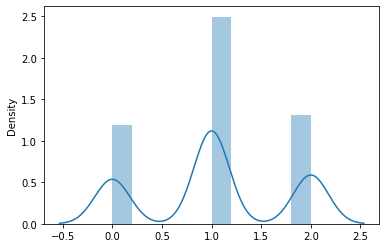

In [80]:
sns.distplot(base_binominal);

é igual contagem de categorias na vida real

- Distribuição de Poisson

In [81]:
# qts de vezes em que algo aconteceu em um intervalo de tempo


In [82]:
from scipy.stats import poisson

In [85]:
base_poisson = poisson.rvs(size=1000, mu=5) #quanto menor o "mu" menor categorias sao geradas, #rvs é so para gerar num alaeatorios para aproximar a distr

In [86]:
min(base_poisson), max(base_poisson)

(0, 13)

In [87]:
np.unique(base_poisson, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 10,  33,  89, 136, 159, 184, 130, 108,  67,  49,  20,   7,   6,
          2]))

ou seja, o numero 0 aparece 10 vezes, etc

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


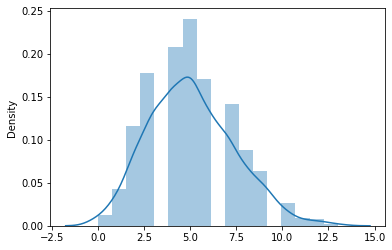

In [88]:
sns.distplot(base_poisson);

intervalo ao decorrer do tempo...

Conhecemos o GaussianNB do naives Bayes, agora vamos ver outros tipos:

**Outros tipos de Naive Bayes : Bernoulli NB e Multinominal NB ( Distribuições )**

- Bernoulli NB

In [89]:
from sklearn.naive_bayes import BernoulliNB

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
from sklearn.model_selection import train_test_split

temos que usar um outro dataset agora

In [94]:
dados = pd.read_csv('/content/census.csv')

In [95]:
dados.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


só faz sentido usarmos a coluna de sexo para a previsão do income, pois só ela faz sentido para usar o Benoulli NB, pois no Benoulli só temos que ter dois tipos de caracteristicas, como no sexo: masculino e feminino

In [96]:
dados['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [97]:
x = dados['sex'].values
x

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

precisamos converter em dados numericos

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
label_encoder = LabelEncoder()

In [100]:
x = label_encoder.fit_transform(x)

In [101]:
x

array([1, 1, 1, ..., 0, 1, 0])

pronto!!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


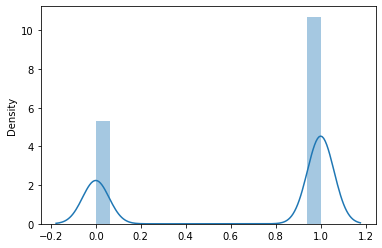

In [102]:
sns.distplot(x);

In [103]:
x.shape

(32561,)

In [105]:
x = x.reshape(-1,1) #precisamos desse formato para treinar o modelo #formato de matriz
x.shape

(32561, 1)

In [107]:
y = dados['income'].values #valor target
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [108]:
resultados_naive_bayes = []
for i in range(30):
  x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2,stratify = y, random_state = i)
  naive_bayes = BernoulliNB()
  naive_bayes.fit(x_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(x_teste)))

print(resultados_naive_bayes)

[0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096, 0.7592507293106096]


In [117]:
#ou de uma unica vez:

In [110]:
bernoulli_NB = BernoulliNB()

In [112]:
bernoulli_NB.fit(x_treinamento, y_treinamento)

BernoulliNB()

In [113]:
previsoes = bernoulli_NB.predict(x_teste)

In [114]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [115]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [116]:
accuracy_score(y_teste, previsoes)

0.7592507293106096

acurácia aceitável, vale lembrar que usamos como atributo preditor somente o atributo genero, paar fazer sentido o uso do Bernoulli Naive Bayes

- Multinominal NB

In [120]:
from sklearn.naive_bayes import MultinomialNB #permite varias categorias

In [121]:
dados.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


transformando elas em numericas, temos:

In [122]:
from sklearn.preprocessing import LabelEncoder
label_encoder0 = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [123]:
dados['workclass'] = label_encoder0.fit_transform(dados['workclass'])
dados['education'] = label_encoder1.fit_transform(dados['education'])
dados['marital-status'] = label_encoder2.fit_transform(dados['marital-status'])
dados['occupation'] = label_encoder3.fit_transform(dados['occupation'])
dados['relationship'] = label_encoder4.fit_transform(dados['relationship'])
dados['race'] = label_encoder5.fit_transform(dados['race'])
dados['native-country'] = label_encoder6.fit_transform(dados['native-country'])

In [124]:
dados.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,Male,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,Male,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,Male,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,Male,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,Female,0,0,40,5,<=50K


In [125]:
x = dados.iloc[:,[1,3,5,6,7,8,13]].values
x

array([[ 7,  9,  4, ...,  1,  4, 39],
       [ 6,  9,  2, ...,  0,  4, 39],
       [ 4, 11,  0, ...,  1,  4, 39],
       ...,
       [ 4, 11,  6, ...,  4,  4, 39],
       [ 4, 11,  4, ...,  3,  4, 39],
       [ 5, 11,  2, ...,  5,  4, 39]])

In [126]:
y = dados.iloc[:,14].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [127]:
 x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2,stratify = y, random_state = i)

In [128]:
multinominal = MultinomialNB()

In [129]:
multinominal.fit(x_treinamento, y_treinamento)

MultinomialNB()

In [130]:
previsao = multinominal.predict(x_teste)
previsao

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [131]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [133]:
accuracy_score(y_teste, previsao)

0.7397512666973745

acurácia um pouco menor que com o algoritimo de BernoulliNB

**Padronização z-score**

temos o dataset:

In [134]:
data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


- sem padronização

In [138]:
x = data.iloc[:,1:4].values
y = data.iloc[:,4].values
x,y

(array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]]),
 array([0, 0, 0, ..., 1, 0, 0]))

usando o mesmo algoritimo de Naives BAYES, mas agora o mais usual, temos:

In [140]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [141]:
resultados_naive_bayes = []
for i in range(30):
  x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2,stratify = y, random_state = i)
  naive_bayes = GaussianNB()
  naive_bayes.fit(x_treinamento, y_treinamento)
  resultados_naive_bayes.append(accuracy_score(y_teste, naive_bayes.predict(x_teste)))

print(resultados_naive_bayes)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [146]:
np.mean(x_treinamento[0]), np.median(x_treinamento[0]), np.std(x_treinamento[0])

(25107.54161278239, 7289.014109090092, 30470.115073990906)

In [149]:
np.mean(x_teste[0]), np.median(x_teste[0]), np.std(x_teste[0])

(16385.94042713694, 4588.472285879389, 19985.290456454084)

-  com Padronização

In [206]:
from sklearn.preprocessing import StandardScaler # com isso nao e necessario calculr o z score manualmente

In [227]:
z_score_treinamento = StandardScaler()
z_score_teste = StandardScaler()

In [228]:
x_treinamento_padronizado = z_score_treinamento.fit_transform(x_treinamento)

In [229]:
x_teste_padronizado = z_score_teste.fit_transform(x_teste)

In [230]:
x_treinamento_padronizado

array([[ 1.61947369, -0.14692359,  0.95840626],
       [ 1.27578474,  0.57787308,  2.4905727 ],
       [ 0.11340719, -1.5041088 , -0.96178507],
       ...,
       [ 1.52322735,  0.87831571,  0.52685557],
       [-0.92604261,  0.0612349 , -0.49834659],
       [-0.57230343,  0.40527752, -1.20456055]])

In [231]:
x_teste_padronizado

array([[-1.45911646e-01,  3.00586050e-02,  1.04687383e-03],
       [ 4.16764786e-01,  1.34840461e+00,  5.27555057e-01],
       [ 1.12752931e+00, -1.27607926e+00,  2.09344135e+00],
       ...,
       [ 6.17443562e-01, -7.71448556e-01,  1.03804948e+00],
       [-1.53273297e+00,  7.43859080e-01, -2.13391891e-01],
       [-1.42905609e+00, -1.32384503e+00, -4.61430180e-01]])

In [221]:
min(x_treinamento_padronizado[0]), max(x_teste_padronizado[0])

(-0.14692359488559328, 0.03005860497781775)

In [222]:
min(x_teste_padronizado[0]), max(x_teste_padronizado[0])

(-0.145911646145242, 0.03005860497781775)

In [223]:
np.mean(x_treinamento_padronizado[0]), np.median(x_treinamento_padronizado[0]), np.std(x_treinamento_padronizado[0])

(0.8103187823431705, 0.9584062555640372, 0.7286916419555313)

In [224]:
np.mean(x_teste_padronizado[0]), np.median(x_teste_padronizado[0]), np.std(x_teste_padronizado[0])

(-0.03826872244595976, 0.0010468738295449681, 0.07703103012402227)

tudo padronizado, nenhum atributo mais importante do que o outro

In [226]:
nb = GaussianNB()

In [232]:
nb.fit(x_treinamento_padronizado, y_treinamento)
previsao = nb.predict(x_teste_padronizado)
previsao

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [233]:
y_teste

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [234]:
accuracy_score(y_teste, previsao)

0.925

neste caso, MESMO usando a padronização, não notamos melhora , mas se usarmos outro algoritimo como KNN SVM, Random Forest, poderiamos notar uma diferença. Apesar que mesmo sem a padronização, já tinhamos uma otima acurácia

**Dados Enviesados com ML**

In [237]:
nova_base = pd.read_csv('/content/house_prices.csv')

In [238]:
nova_base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


o objetivo aqui é olhar na coluna sqft_living e fazer a previsao do preço da casa 
na coluna price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


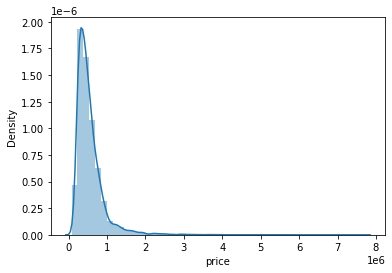

In [239]:
sns.distplot(nova_base['price']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


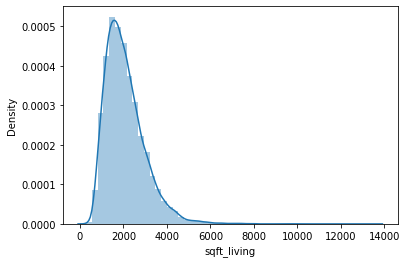

In [240]:
sns.distplot(nova_base['sqft_living']);

esta enviesada

In [241]:
#sem tratamento de dados

- Regressão Linear

In [242]:
from sklearn.linear_model import LinearRegression

In [243]:
x = nova_base['sqft_living'].values

In [244]:
y = nova_base['price'].values

In [246]:
x.shape

(21613,)

In [247]:
x = x.reshape(-1,1)

In [248]:
x.shape

(21613, 1)

In [249]:
y.shape

(21613,)

fazendo "teste" sem fazer treinamento neste modelo

In [250]:
regressao = LinearRegression()

In [251]:
regressao.fit(x,y)

LinearRegression()

In [252]:
previsao = regressao.predict(x)
previsao

array([287555.06702451, 677621.82640197, 172499.40418656, ...,
       242655.29616092, 405416.96554144, 242655.29616092])

In [253]:
y


array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [254]:
#avaliando o algoritimo

In [256]:
from sklearn.metrics import mean_absolute_error, r2_score

In [259]:
mean_absolute_error(y, previsao) #em media vamos errar(pra cima ou pra baixo)

173688.2733595311

In [261]:
r2_score(y, previsao) #quanto mais perto de 1 melhor

0.4928532179037931

o resultado deve ser melhor quando usarmos mais atributos para fazer a previsao, aqui só usamos um.

In [262]:
# com tratamento dos dados agora

In [263]:
x_novo = np.log(x)

In [264]:
x_novo

array([[7.07326972],
       [7.85166118],
       [6.64639051],
       ...,
       [6.92755791],
       [7.37775891],
       [6.92755791]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


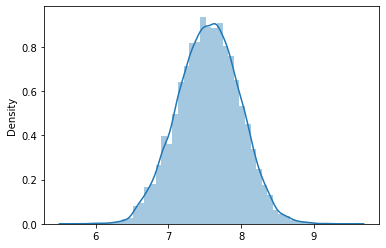

In [265]:
sns.distplot(x_novo);

agora temos uma distr parecido com a distr normal, e nao esta mais enviesada

In [266]:
#recriar o modelo

In [267]:
regressao = LinearRegression()

In [268]:
regressao.fit(x_novo,y)

LinearRegression()

In [270]:
previsao = regressao.predict(x_novo)

In [271]:
previsao

array([287888.94654388, 699383.60994277,  62220.3431218 , ...,
       210858.76861484, 448856.38186826, 210858.76861484])

In [272]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [273]:
mean_absolute_error(y, previsao) #em media vamos errar(pra cima ou pra baixo)

187308.7468220667

In [274]:
r2_score(y, previsao) #quanto mais perto de 1 melhor

0.3741814092179204

apesar de ter diminuido, é um bom truque mas usamos somente um atributo para fazer a previsao, o que prejudica o modelo

In [275]:
#mas vamos tentar melhorar

In [276]:
y_novo = np.log(y)

In [277]:
y_novo

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


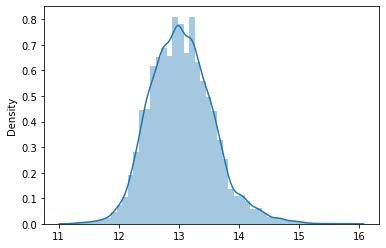

In [278]:
sns.distplot(y_novo);

assim como o x_novo, o y_novo tem uma dstr normal agora

In [279]:
#recriar o modelo de novo

In [280]:
regressao = LinearRegression()

In [281]:
regressao.fit(x_novo, y_novo)

LinearRegression()

In [282]:
previsoes = regressao.predict(x_novo)
previsoes

array([12.64862279, 13.29995815, 12.29142267, ..., 12.52669538,
       12.9034105 , 12.52669538])

In [283]:
y_novo

array([12.30998211, 13.19561384, 12.10071213, ..., 12.90445858,
       12.89921983, 12.69158046])

In [284]:
mean_absolute_error(y_novo, previsoes) #em media vamos errar(pra cima ou pra baixo)

0.314671784942507

In [285]:
r2_score(y_novo, previsoes) #quanto mais perto de 1 melhor

0.45550706431577015

houve uma melhora, mas novamente, fazer previsão com apenas um atributo, não ajuda muito, é sempre melhor fazermos uma regressao com mais atributos, do que uma simples regressao linear, mas vimos uma excelente tecnica para fazer uma melhor previsão usando Regressao Linear em ML